In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List

image_data = np.loadtxt("blur.txt")
image_data.shape

(1024, 1024)

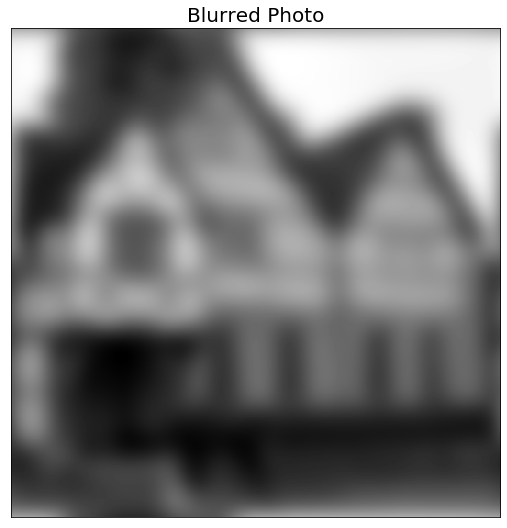

In [2]:
fig = plt.figure()
fig.set_size_inches(9,9)
plt.imshow(image_data, cmap='gray')
plt.title("Blurred Photo", fontsize = 20)
plt.yticks([])
plt.xticks([])
plt.savefig("blurred.png")

In [3]:
def f(x,y, sigma=25, L=1024):
    return np.exp(-((x)**2 + (y)**2)/(2*sigma**2)) \
            + np.exp(-((x - L)**2 + (y)**2)/(2*sigma**2)) \
            + np.exp(-((x)**2 + (y - L)**2)/(2*sigma**2)) \
            + np.exp(-((x - L)**2 + (y - L)**2)/(2*sigma**2))

In [4]:
x = np.arange(0, image_data.shape[0])
y = np.arange(0, image_data.shape[1])
xx, yy = np.meshgrid(x,y)
z = f(xx,yy)

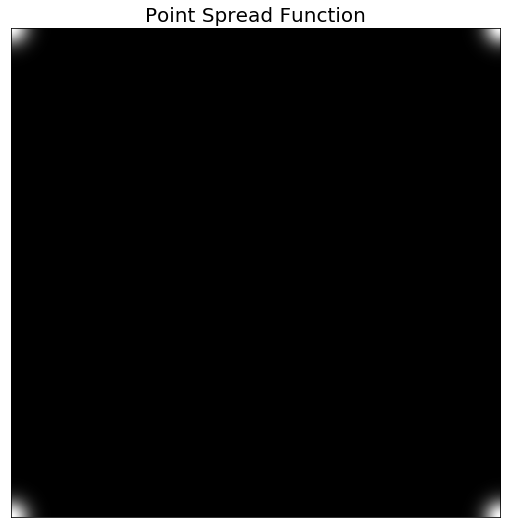

In [5]:
fig = plt.figure()
fig.set_size_inches(9,9)
plt.imshow(z, cmap='gray')
plt.title("Point Spread Function", fontsize = 20)
plt.yticks([])
plt.xticks([])
plt.savefig("point_spread.png")

In [6]:
def deconvolution(datafile):
    image_data = np.loadtxt(datafile)
    L = image_data.shape[0]
    def f(x,y, sigma=25, L=L):
        return np.exp(-((x)**2 + (y)**2)/(2*sigma**2)) \
                + np.exp(-((x - L)**2 + (y)**2)/(2*sigma**2)) \
                + np.exp(-((x)**2 + (y - L)**2)/(2*sigma**2)) \
                + np.exp(-((x - L)**2 + (y - L)**2)/(2*sigma**2))
    
    x = np.arange(0, image_data.shape[0])
    y = np.arange(0, image_data.shape[1])
    xx, yy = np.meshgrid(x,y)
    z = f(xx,yy)
    
    ft_image = np.fft.rfft2(image_data)
    ft_z = np.fft.rfft2(z)
    ft_z[abs(ft_z) < 1e-3] = 1e-3
    
    ft_sharper_image = ft_image / (L*L * ft_z)
    return np.fft.irfft2(ft_sharper_image)

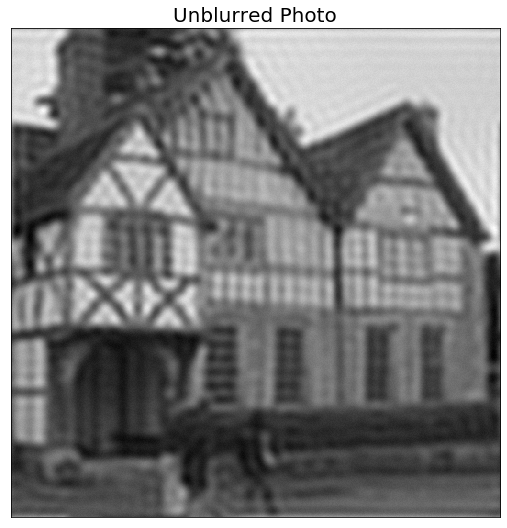

In [7]:
unblurred_image = deconvolution("blur.txt")

fig = plt.figure()
fig.set_size_inches(9,9)
plt.imshow(unblurred_image, cmap='gray')
plt.title("Unblurred Photo", fontsize = 20)
plt.yticks([])
plt.xticks([])
plt.savefig("unblurred.png")